In [1]:
""" setup """
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
plt.style.use(['classic'])

from redbaron import redbaron
redbaron.ipython_behavior = False

from pyha.simulation.simulation_interface import assert_sim_match

from scipy import signal
from pyhacores.under_construction.clock_recovery.gardner import GardnerTimingRecovery
from scipy.interpolate import interp1d

<IPython.core.display.Javascript object>


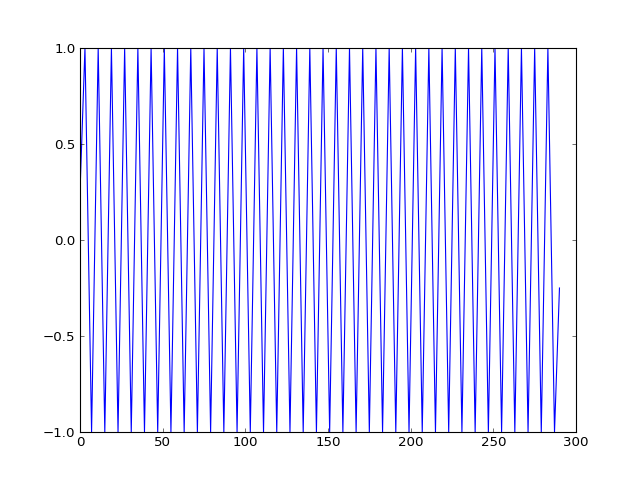

In [2]:
def insig(bits, sps, int_delay=0):
    nrz = [[1] * sps if x == 1 else [-1] * sps for x in bits]
    nrz = np.array(nrz).flatten()

    taps = [1 / sps] * sps
    matched = np.convolve(nrz, taps, mode='full')

    # delays
    sig = matched[int_delay:]
    return sig

def fract_delay(sig, fract_delay=0.0):
    f = interp1d(range(len(sig)), sig)
    new_x = np.array(range(len(sig))) + fract_delay
    fract_sig = f(new_x[:-1])
    return fract_sig

# input data
data = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]*4
sps = 4
sig = insig(data, sps, 0)

plt.plot(sig)
plt.show()


In [3]:
def case(i_delay=0, f_delay=0):
    data = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]*8
    sps = 4
    sig = insig(data, sps, i_delay)
    
    #channel
    sig_f = fract_delay(sig, f_delay)
    sig_f = np.append(np.random.uniform(-1, 1, 256), sig_f)

    recover = GardnerTimingRecovery(sps)

    ret, err, mu = recover.model_main(sig_f)
    
    plt.plot(ret, label='ret')
    plt.plot(err, label='err')
    plt.plot(mu, label='mu')
    plt.plot(sig_f[::sps], label='simple sampler')
    plt.title('Fractional delay:' + str(f_delay))
    plt.grid()
    plt.legend()
    plt.show()

d: 0  mu:  0.0973388550384
d: 1  mu:  0.0866072631213
d: 2  mu:  0.243109785317
d: 3  mu:  0.0395120561139
d: 0  mu:  0.0936186237116
d: 1  mu:  0.176912857458
d: 0  mu:  0.0149690734581


<IPython.core.display.Javascript object>


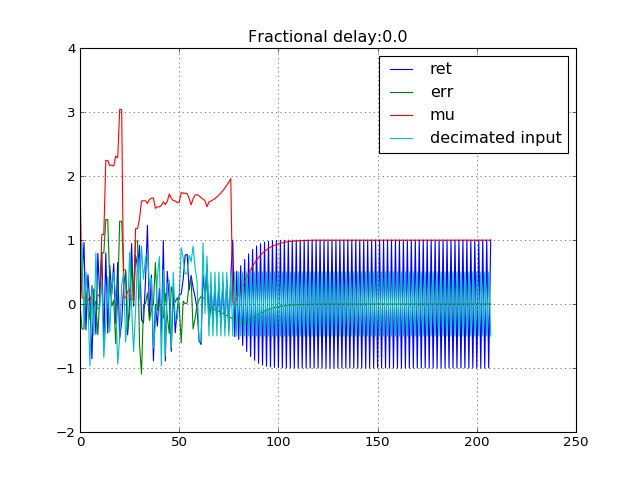

d: 0  mu:  0.15715629886
d: 1  mu:  0.0956715533422
d: 2  mu:  0.26331673663
d: 3  mu:  0.128824072202
d: 0  mu:  0.0113857990428
d: 1  mu:  0.101640465377
d: 2  mu:  0.0467770076808
d: 3  mu:  0.150915950357
d: 0  mu:  0.0043565754012


<IPython.core.display.Javascript object>


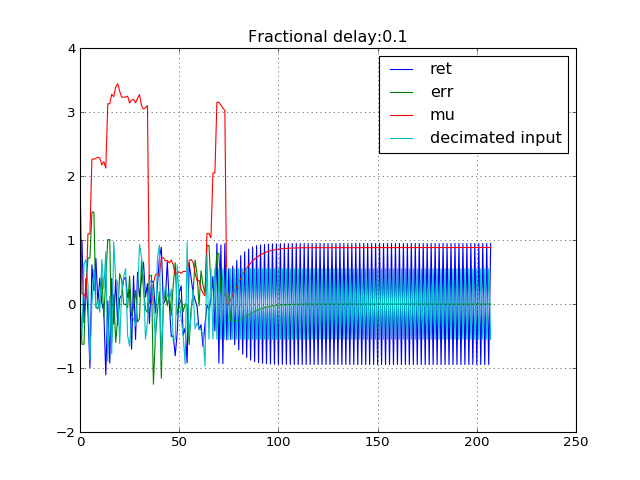

d: 0  mu:  0.0232462802263
d: 1  mu:  0.101083089882
d: 2  mu:  0.00259827935066
d: 3  mu:  0.19713018585
d: 0  mu:  0.0487528645428


<IPython.core.display.Javascript object>


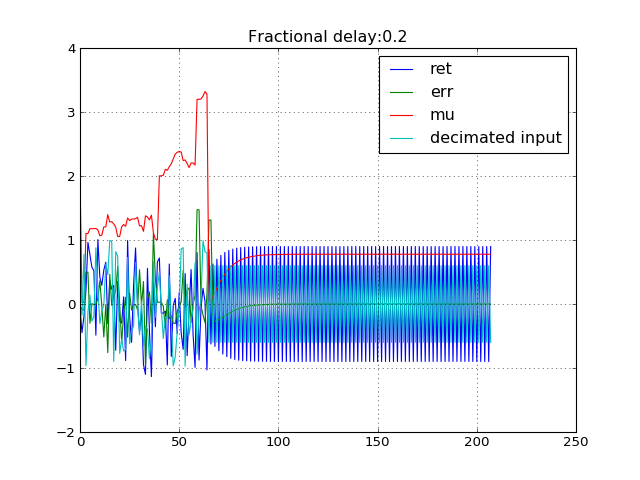

d: 0  mu:  0.172019044102
d: 1  mu:  0.153002275956
d: 2  mu:  0.0606096984255
d: 3  mu:  0.0113996621664
d: 0  mu:  0.0261232719633
d: 1  mu:  0.036392339402
d: 2  mu:  0.236410782107
d: 3  mu:  0.0519977426197
d: 0  mu:  0.0148944233302


<IPython.core.display.Javascript object>


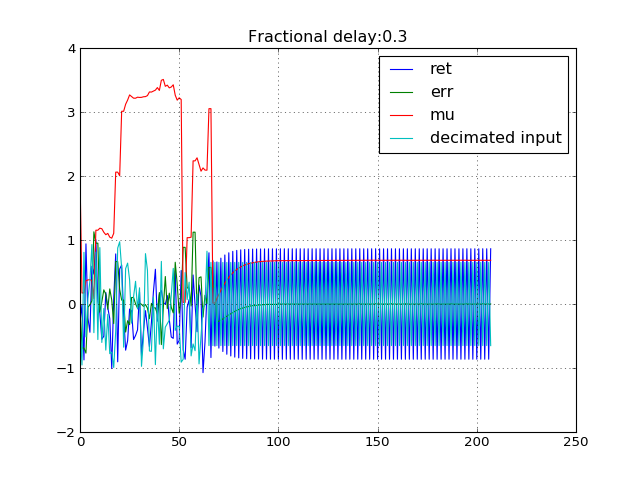

d: 0  mu:  0.00444199368626


<IPython.core.display.Javascript object>


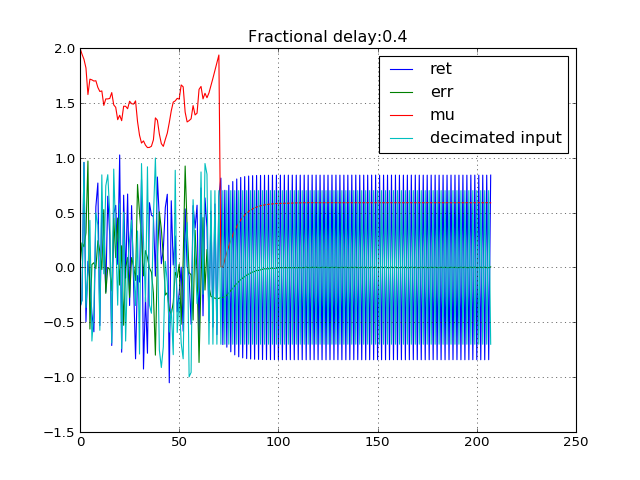

d: 0  mu:  0.244046822397
d: 1  mu:  0.048850925923
d: 2  mu:  0.216914937374
d: 3  mu:  0.0112754304614
d: 0  mu:  0.125184364474


<IPython.core.display.Javascript object>


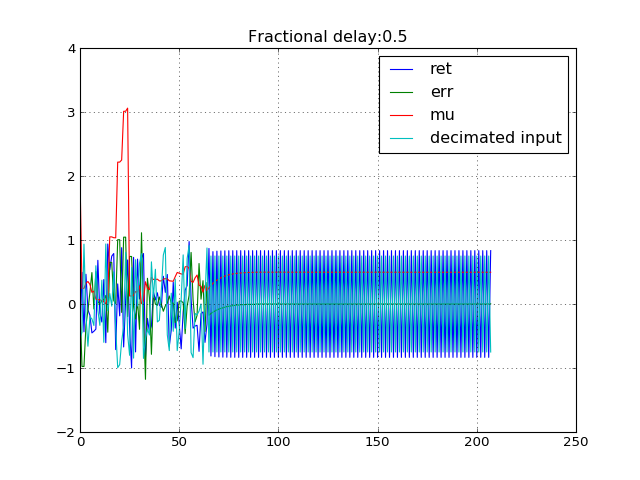

d: 0  mu:  0.0745518834171
d: 1  mu:  0.0242914207261
d: 2  mu:  0.113531710438
d: 3  mu:  0.21873001902
d: 0  mu:  0.0649514158562
d: 1  mu:  0.134212227285
d: 0  mu:  0.0302649724952


<IPython.core.display.Javascript object>


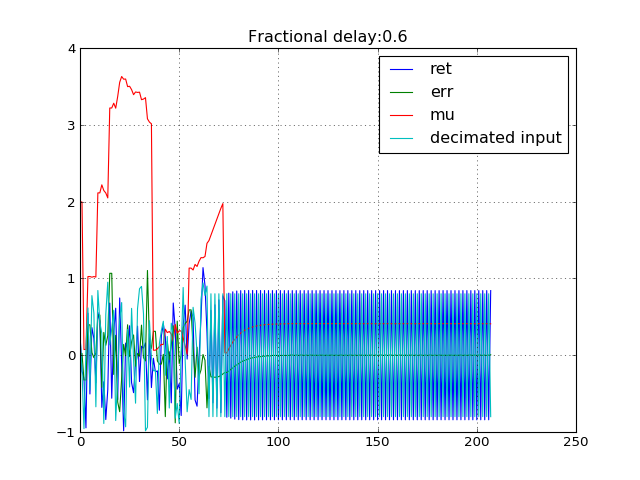

d: 0  mu:  0.00678283769774
d: 1  mu:  0.0613735735175
d: 2  mu:  0.0719169946327
d: 3  mu:  0.0160813594922
d: 0  mu:  0.00361085556185
d: 1  mu:  0.0359651374206
d: 2  mu:  0.00774334464596
d: 3  mu:  0.0705284184969
d: 0  mu:  0.00714803700595
d: 1  mu:  0.346481990854
d: 0  mu:  0.00362850024152


<IPython.core.display.Javascript object>


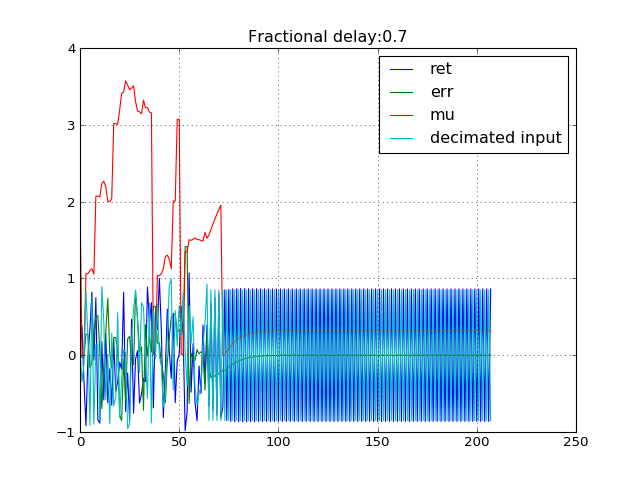

d: 0  mu:  0.00130769912719
d: 1  mu:  0.00991183741508
d: 2  mu:  0.0116821596278
d: 3  mu:  0.000598848237773
d: 0  mu:  0.145047043642
d: 1  mu:  0.0461663448306
d: 2  mu:  0.0551587078121
d: 3  mu:  0.0301002815231
d: 0  mu:  0.0553333460846
d: 1  mu:  0.0443416857589
d: 2  mu:  0.127694658185
d: 3  mu:  0.0746807366827
d: 0  mu:  0.14346287538


<IPython.core.display.Javascript object>


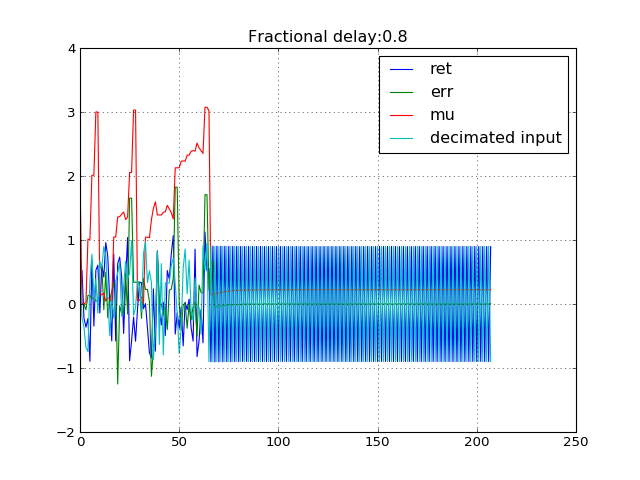

d: 0  mu:  0.384766365998
d: 1  mu:  0.0733899324813
d: 2  mu:  0.159020170134
d: 3  mu:  0.037534561347
d: 0  mu:  0.200871169705
d: 1  mu:  0.199947163543
d: 2  mu:  0.115632619277
d: 3  mu:  0.129016675115
d: 0  mu:  0.062171240166


<IPython.core.display.Javascript object>


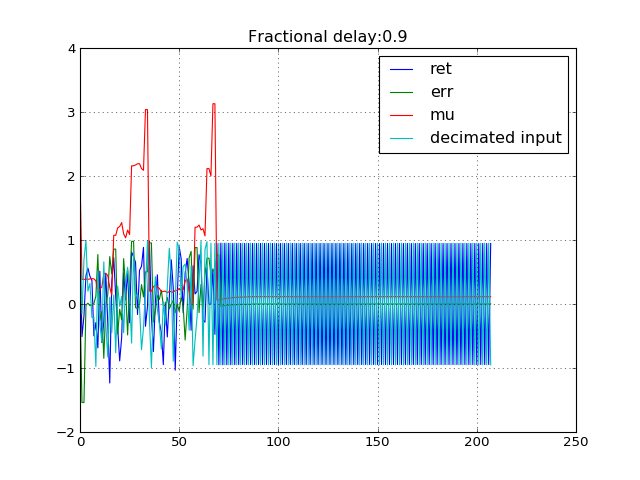

In [5]:
for x in range(10):
    case(2, x/10)